In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
y = [1.00000e+00, 1.00000e+00, 2.00000e+00, 2.00000e+00, 5.00000e+00,
       5.00000e+00, 5.00000e+00, 5.00000e+00, 5.00000e+00, 7.00000e+00,
       8.00000e+00, 8.00000e+00, 1.10000e+01, 1.10000e+01, 1.10000e+01,
       1.10000e+01, 1.10000e+01, 1.10000e+01, 1.10000e+01, 1.10000e+01,
       1.20000e+01, 1.20000e+01, 1.30000e+01, 1.30000e+01, 1.30000e+01,
       1.30000e+01, 1.30000e+01, 1.30000e+01, 1.30000e+01, 1.30000e+01,
       1.50000e+01, 1.50000e+01, 1.50000e+01, 1.50000e+01, 1.50000e+01,
       1.50000e+01, 1.60000e+01, 1.60000e+01, 2.40000e+01, 3.00000e+01,
       5.30000e+01, 7.30000e+01, 1.04000e+02, 1.72000e+02, 2.17000e+02,
       3.36000e+02, 4.50000e+02, 5.14000e+02, 7.08000e+02, 1.10500e+03,
       1.55700e+03, 2.14700e+03, 2.85700e+03, 2.91800e+03, 4.30700e+03,
       6.09600e+03, 8.87300e+03, 1.40940e+04, 1.94030e+04, 2.57250e+04,
       3.36340e+04, 4.36630e+04, 5.37360e+04, 6.57780e+04, 8.38360e+04,
       1.01657e+05, 1.21465e+05, 1.40909e+05, 1.61831e+05, 1.88172e+05,
       2.13242e+05, 2.43622e+05, 2.75367e+05, 3.08650e+05, 3.36802e+05,
       3.66317e+05, 3.97121e+05, 4.28654e+05, 4.62780e+05, 4.96535e+05,
       5.26396e+05, 5.55313e+05, 5.80619e+05, 6.07670e+05, 6.36350e+05,
       6.67592e+05, 6.99706e+05, 7.32197e+05, 7.58809e+05, 7.84326e+05,
       8.11865e+05, 8.40220e+05]
x = range(len(y))

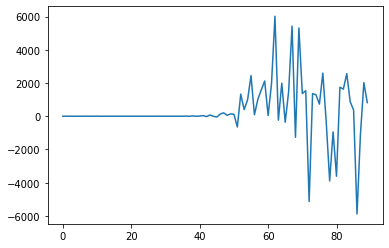

In [11]:
plt.plot(np.diff(y,2))

In [46]:
def before_sign(x):
    if x <0:
        return -1
    if x>0:
        return 1
    else:
        return 0
def after_sign(x):
    if x >0:
        return -1
    if x<0:
        return 1
    else:
        return 0

before_vect = np.vectorize(before_sign)
after_vect = np.vectorize(after_sign)

In [45]:
# give this np.diff(confirmed_cases,2)

def get_inflection(case_der, window_size = 20):
    inflection_point = 0
    max_val = 0
    for idx, val in enumerate(case_der):
        if idx ==0:
            continue
        if idx == len(case_der)-1:
            continue
        if idx <window_size:
            if np.sum(before_vect(case_der[0:idx])) + np.sum(after_vect(case_der[idx+1:idx+1+window_size]))> max_val:
                inflection_point = idx
                max_val = np.sum(before_vect(case_der[0:idx])) + np.sum(after_vect(case_der[idx+1:idx+1+window_size]))
        if idx >= window_size and idx < len(y_der)-window_size:
            if np.sum(before_vect(case_der[idx-window_size:idx])) + np.sum(after_vect(case_der[idx+1:idx+1+window_size]))> max_val:
                inflection_point = idx
                max_val = np.sum(before_vect(case_der[idx-window_size:idx])) + np.sum(after_vect(case_der[idx+1:idx+1+window_size]))
        if idx >=window_size and idx >= len(y_der)-window_size:
            if np.sum(before_vect(case_der[idx-window_size:idx])) + np.sum(after_vect(case_der[idx+1:]))> max_val:
                inflection_point = idx
                max_val = np.sum(before_vect(case_der[idx-window_size:idx])) + np.sum(after_vect(case_der[idx+1:]))
    return inflection_point

In [44]:
y_der = np.diff(y,2)
get_inflection(y_der)

76